In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

Data Preprocessing

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
df.info() #checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [4]:
df.isnull().sum() #checking for null values

,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


In [5]:
# Encoding categorical data
labelencoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = labelencoder.fit_transform(df[col])

In [6]:
df.describe()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,40.866841,0.185379,0.127937,0.073107,0.018277,1.950392,2.561358,2.924282,2.550914,0.644909,1.566580,2.206266,0.543081,0.046997,0.242820,1.574413,0.281984
std,15.134494,0.389113,0.334457,0.260653,0.134126,0.630917,1.350110,1.172106,0.890257,0.479167,0.643233,1.344667,0.857732,0.211910,0.773274,0.917585,0.450554
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,3.000000,2.500000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,5.000000,3.000000,1.000000,2.000000,6.000000,2.000000,1.000000,4.000000,3.000000,1.000000


Data Visualization

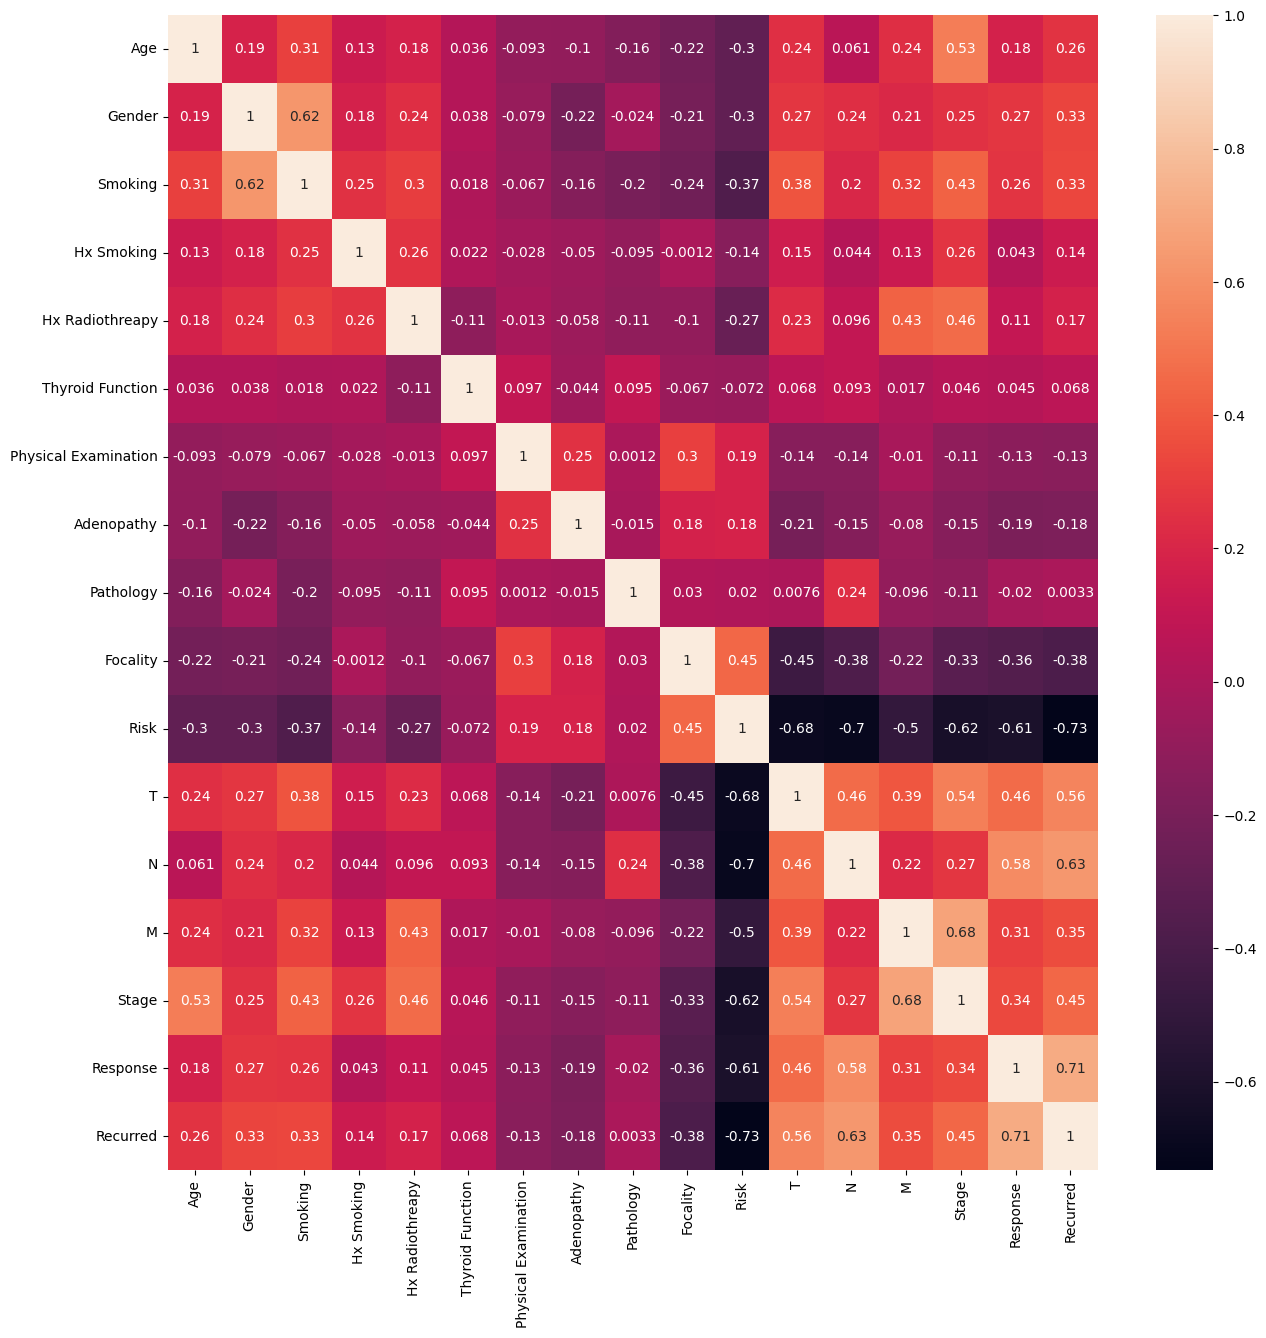

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

(array([275., 108.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

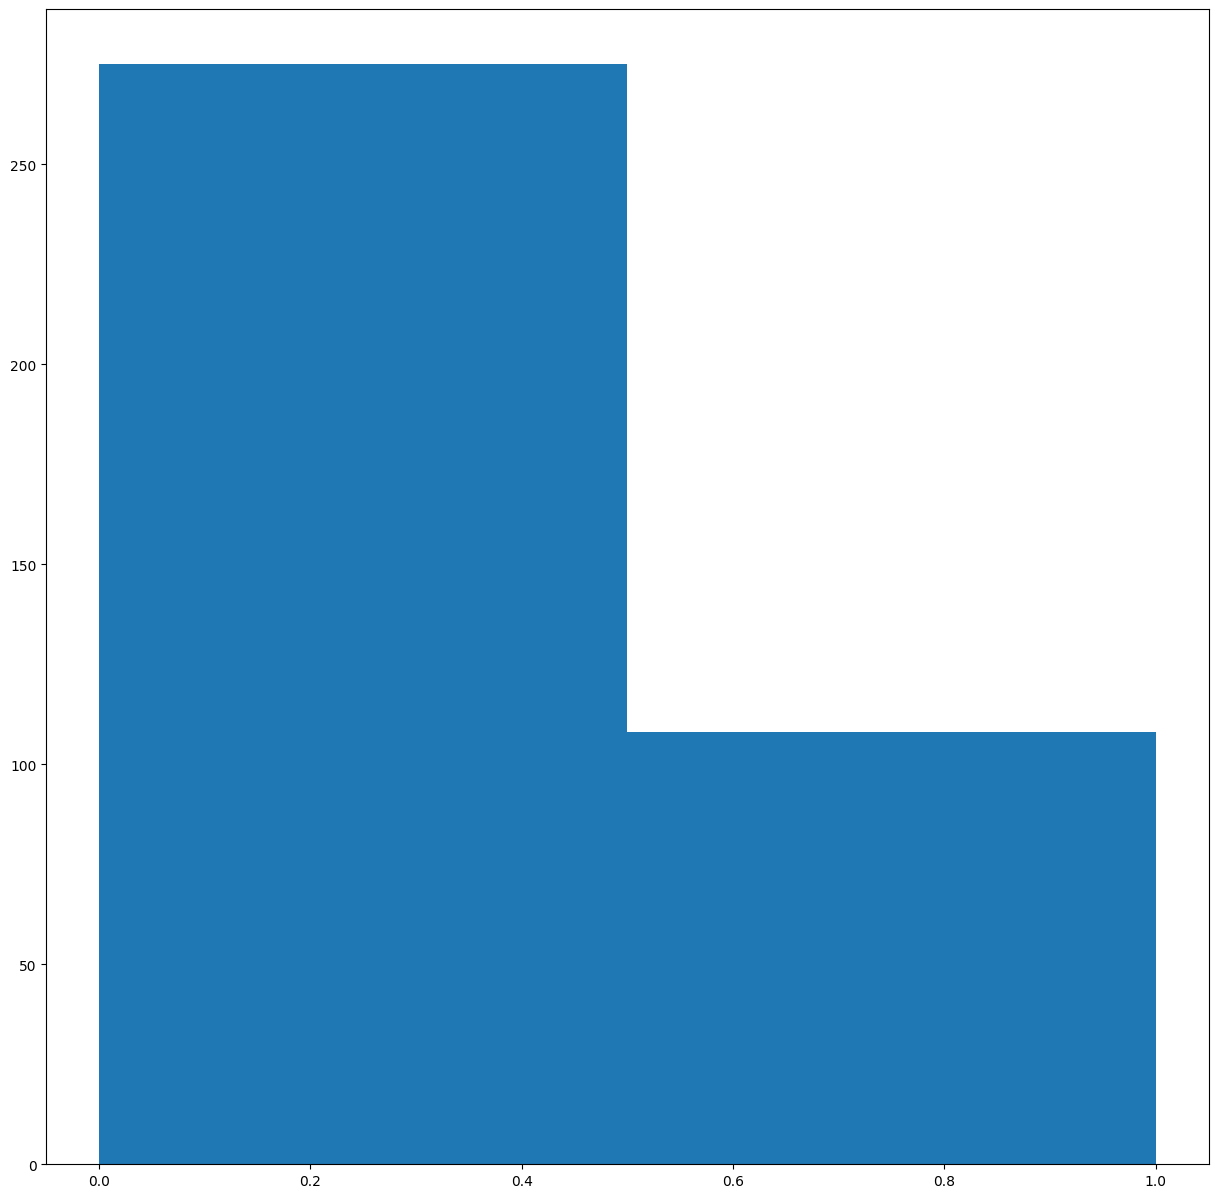

In [8]:
plt.figure(figsize=(15,15))
plt.hist(df["Recurred"], bins=2)

<Axes: xlabel='Recurred', ylabel='count'>

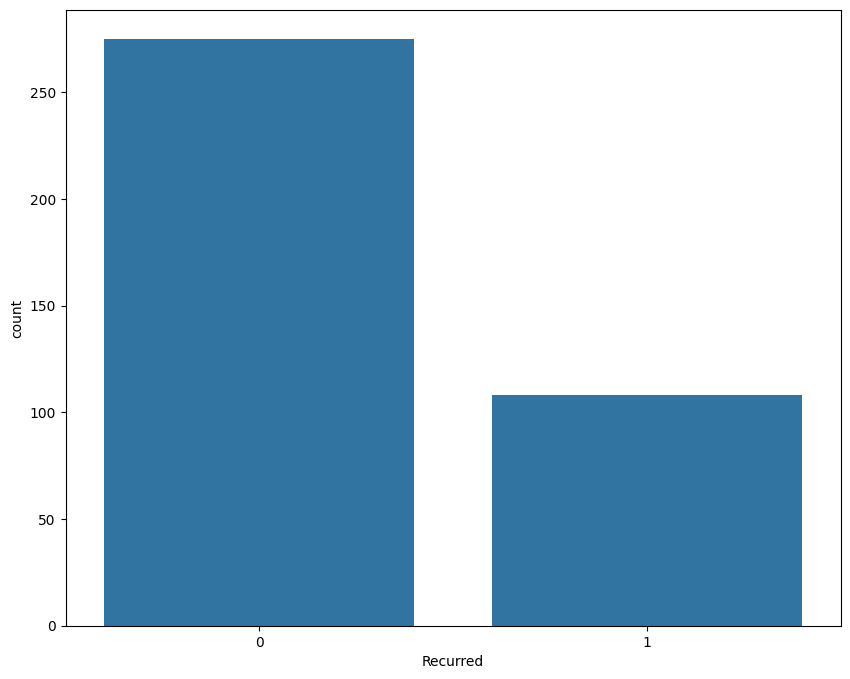

In [9]:
plt.figure(figsize=(10, 8))
sns.countplot(x="Recurred", data=df)

<Axes: xlabel='Recurred', ylabel='Age'>

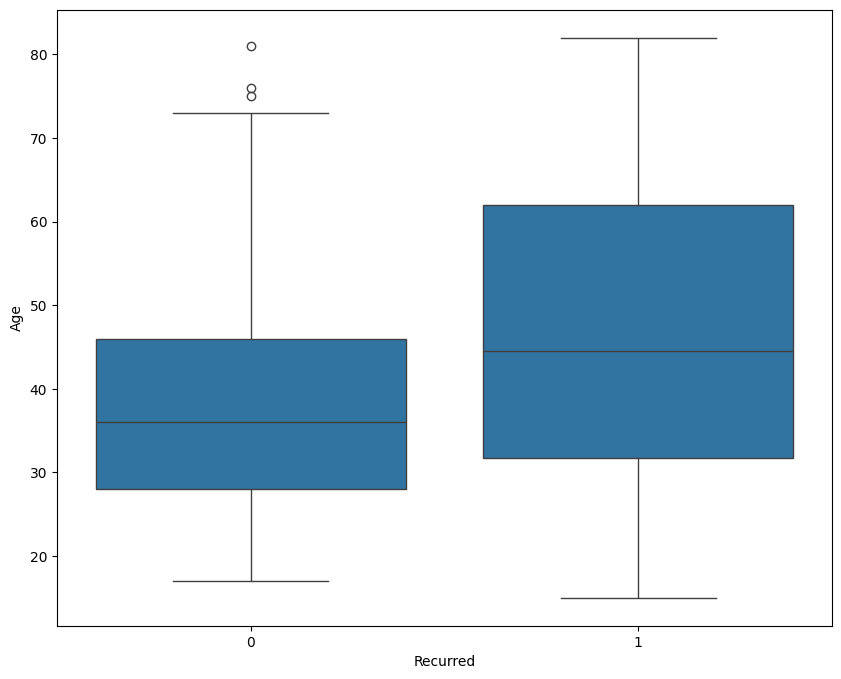

In [10]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Recurred", y="Age", data=df)

Data Training

In [11]:
# Splitting data into features and target
X = df.drop('Recurred', axis=1)
y = df['Recurred']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Function to perform classification
def perform_classification(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

Decision Tree

In [13]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
perform_classification(decision_tree)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.81      0.89      0.85        19

    accuracy                           0.92        77
   macro avg       0.89      0.91      0.90        77
weighted avg       0.93      0.92      0.92        77



Random Forest

In [14]:
#Random Forest
random_forest = RandomForestClassifier()
perform_classification(random_forest)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



Logistic Regression

In [15]:
#Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)
perform_classification(logistic_regression)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        58
           1       0.94      0.79      0.86        19

    accuracy                           0.94        77
   macro avg       0.94      0.89      0.91        77
weighted avg       0.94      0.94      0.93        77



Gradient Boost Classifier

In [16]:
#Gradient Boost
gradient_boost = GradientBoostingClassifier()
perform_classification(gradient_boost)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.95      0.95      0.95        19

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77



K-Nearest Neighbors

In [17]:
#KNN
knn = KNeighborsClassifier()
perform_classification(knn)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        58
           1       0.90      0.47      0.62        19

    accuracy                           0.86        77
   macro avg       0.88      0.73      0.77        77
weighted avg       0.86      0.86      0.84        77



Mlp Classifier

In [18]:
#MLP
mlp = MLPClassifier(max_iter=1000)
perform_classification(mlp)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.84      0.91        19

    accuracy                           0.96        77
   macro avg       0.98      0.92      0.94        77
weighted avg       0.96      0.96      0.96        77



GaussianNB

In [19]:
#GaussianNB
gaussian = GaussianNB()
perform_classification(gaussian)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        58
           1       0.92      0.58      0.71        19

    accuracy                           0.88        77
   macro avg       0.90      0.78      0.82        77
weighted avg       0.89      0.88      0.87        77



Model Comparison

In [20]:
# Accuracy of all models
print("Accuracy of Random Forest Classifier: ", accuracy_score(y_test, random_forest.predict(X_test)) * 100, "%")
print("Accuracy of Decision Tree Classifier: ", accuracy_score(y_test, decision_tree.predict(X_test)) * 100, "%")
print("Accuracy of Logistic Regression Classifier: ", accuracy_score(y_test, logistic_regression.predict(X_test)) * 100, "%")
print("Accuracy of Gradient Boost Classifier: ", accuracy_score(y_test, gradient_boost.predict(X_test)) * 100, "%")
print("Accuracy of KNN Classifier: ", accuracy_score(y_test, knn.predict(X_test)) * 100, "%")
print("Accuracy of MLP Classifier: ", accuracy_score(y_test, mlp.predict(X_test)) * 100, "%")
print("Accuracy of Gaussian Classifier: ", accuracy_score(y_test, gaussian.predict(X_test)) * 100, "%")

Accuracy of Random Forest Classifier:  98.7012987012987 %
Accuracy of Decision Tree Classifier:  92.20779220779221 %
Accuracy of Logistic Regression Classifier:  93.5064935064935 %
Accuracy of Gradient Boost Classifier:  97.40259740259741 %
Accuracy of KNN Classifier:  85.71428571428571 %
Accuracy of MLP Classifier:  96.1038961038961 %
Accuracy of Gaussian Classifier:  88.31168831168831 %


In [21]:
# List of models
models = [random_forest, decision_tree, logistic_regression, gradient_boost, knn, mlp, gaussian]
models.sort(key=lambda x: x.score(X_test, y_test), reverse=True)

for model in models:
    i = models.index(model)
    print(model)
    print(i + 1., "Test Accuracy {:.2f}%".format(models[i].score(X_test, y_test) * 100))

RandomForestClassifier()
1.0 Test Accuracy 98.70%
GradientBoostingClassifier()
2.0 Test Accuracy 97.40%
MLPClassifier(max_iter=1000)
3.0 Test Accuracy 96.10%
LogisticRegression(max_iter=1000)
4.0 Test Accuracy 93.51%
DecisionTreeClassifier()
5.0 Test Accuracy 92.21%
GaussianNB()
6.0 Test Accuracy 88.31%
KNeighborsClassifier()
7.0 Test Accuracy 85.71%


 # Best model is Random Forest